In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = 'balanced_df.csv'
df = pd.read_csv(file_path)

# Encode categorical labels if necessary
if 'stage' in df.columns:
    label_encoder = LabelEncoder()
    df['stage'] = label_encoder.fit_transform(df['stage'])

# Separate features and target
X = df.drop(columns=['stage', 'stage_encoded', 'Unnamed: 0'])
y = df['stage']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train classification model with regularization to prevent overfitting
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
# print(f"Cross-validation accuracy scores: {scores}")
# print(f"Mean accuracy: {scores.mean():.4f}")

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

# Evaluation function
def evaluate_single_sample(model, sample):
    sample_reshaped = sample.to_frame().T  # Ensure the sample is a DataFrame with a single row
    prediction = model.predict(sample_reshaped)
    return prediction[0]
result=[]
# Test the evaluation function
for i in range(X_test.shape[0]):
    sample = X_test.iloc[i]  # Take the i-th row of the test set
    true_stage = y_test.iloc[i]  # Get the true label of the i-th row
    predicted_stage = evaluate_single_sample(model, sample)
    result.append(true_stage == predicted_stage)
print(f"{sum(result)},\n accuracy: {sum(result)/X_test.shape[0]}")

Accuracy: 0.9949
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      0.98      0.99       214
           2       0.98      1.00      0.99       119
           3       0.99      1.00      1.00       213
           4       1.00      1.00      1.00       215

    accuracy                           0.99       975
   macro avg       0.99      1.00      0.99       975
weighted avg       0.99      0.99      0.99       975

970,
 accuracy: 0.9948717948717949


In [3]:
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))


  Feature  Importance
8   pNN50    0.146576
7    NN50    0.141936
1    SDNN    0.127662
0    AVNN    0.123162
4   MinHR    0.117288
6   RMSSD    0.116638
2  MeanHR    0.081549
3   StdHR    0.075988
5   MaxHR    0.069201


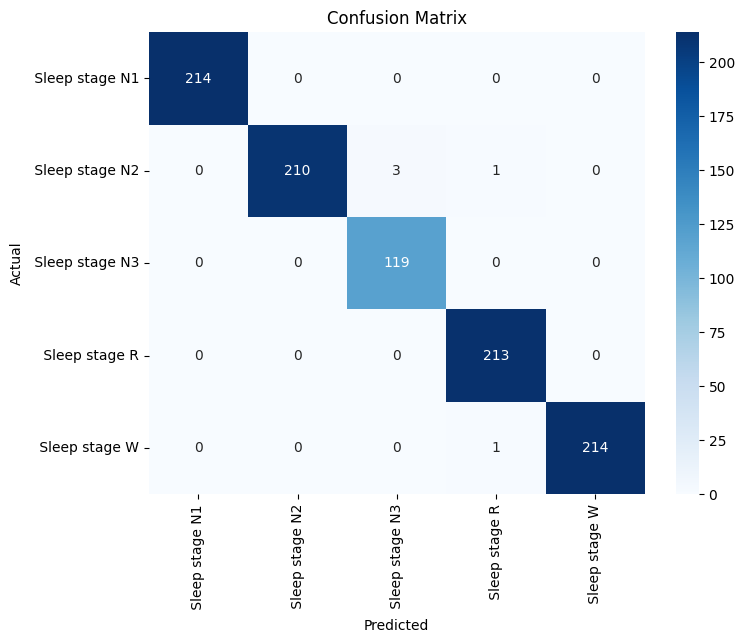

In [4]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


(138244, 10)


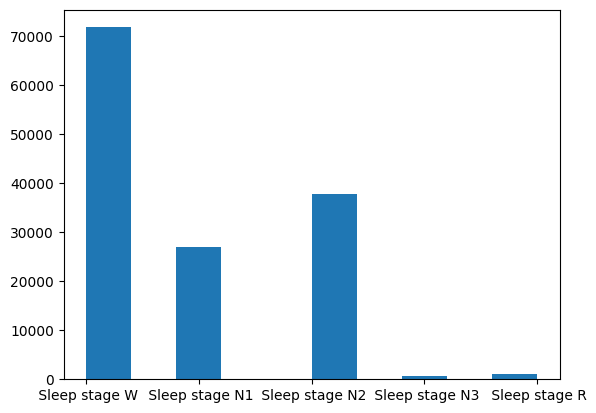

Accuracy: 0.9962
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26917
           1       1.00      0.99      1.00     37878
           2       0.70      1.00      0.82       595
           3       0.80      1.00      0.89      1064
           4       1.00      1.00      1.00     71790

    accuracy                           1.00    138244
   macro avg       0.90      1.00      0.94    138244
weighted avg       1.00      1.00      1.00    138244



In [19]:
import os
from tqdm import tqdm 
files = os.listdir("C:\\Users\\TobyC\\Documents\\mednap\\dataset\\output")
df =  pd.read_csv('C:\\Users\\TobyC\\Documents\\mednap\\dataset\\output\\SN002_done.csv')
for i in files:
    df1 =  pd.read_csv('C:\\Users\\TobyC\\Documents\\mednap\\dataset\\output\\SN007_done.csv')
    df = pd.concat([df,df1])
print(df.shape)
plt.hist(df['stage'])
plt.show()
if 'stage' in df.columns:
    label_encoder = LabelEncoder()
    df['stage'] = label_encoder.fit_transform(df['stage'])
X = df.drop(columns=['stage'])
y = df['stage']

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)


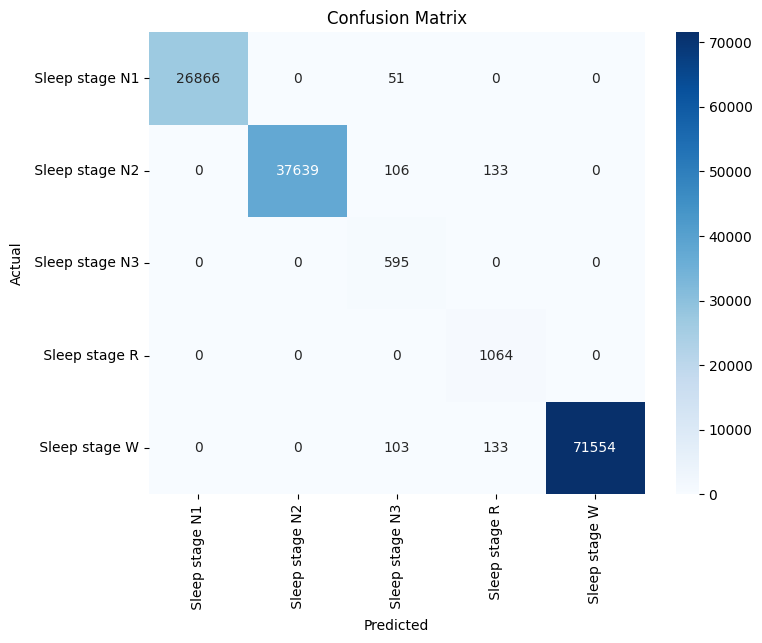

In [20]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:
import pickle

In [22]:
# Save the trained model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# # Load the model for future use
# with open('random_forest_model.pkl', 'rb') as model_file:
#     loaded_model = pickle.load(model_file)
